In [1]:
!pip install pandas
!pip install rdkit  
!pip install scikit-learn
!pip install tensorflow
from IPython.display import clear_output
clear_output()

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem

In [3]:
# Import and check X and Y matrix

In [3]:
# Download file from https://drive.google.com/file/d/1V6gDAZvJKbWW43GSi6qg6VLjS2AuRSeR/view?usp=sharing as is bigger than 25 MB
df = pd.read_csv("X-cell-dose-time-smiles.csv")

In [4]:
X = df.drop(df.columns[0], axis=1)
X.shape

(126427, 953)

In [5]:
# Download file from https://drive.google.com/file/d/1iAAKrztJQ-fi9CWUVXy5w6_OZL-BfZeF/view?usp=sharing as is bigger than 25 MB
df1 = pd.read_csv("Y-Gene_perturbation_info.csv")

In [6]:
Y = df1.drop(df1.columns[0], axis=1)
Y.shape

(126427, 978)

In [8]:
# Entrenamiento de la red neuronal

In [7]:
from sklearn.model_selection import train_test_split

# Split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Print the shapes of the resulting arrays
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (101141, 953)
y_train shape: (101141, 978)
x_test shape: (25286, 953)
y_test shape: (25286, 978)


In [8]:
import tensorflow as tf

# Define the input shape
input_shape = (953,)

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='linear', input_shape=input_shape),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='linear'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='linear'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(978)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model on your data
clear_output()
model.fit(x_train, y_train, epochs=10)

model.save('my_model.h5')

Epoch 1/10
3161/3161 [==============================] - 11s 3ms/step - loss: 1.3939
Epoch 2/10
3161/3161 [==============================] - 10s 3ms/step - loss: 1.3878
Epoch 3/10
3161/3161 [==============================] - 10s 3ms/step - loss: 1.3875
Epoch 4/10
3161/3161 [==============================] - 10s 3ms/step - loss: 1.3875
Epoch 5/10
3161/3161 [==============================] - 10s 3ms/step - loss: 1.3875
Epoch 6/10
3161/3161 [==============================] - 10s 3ms/step - loss: 1.3875
Epoch 7/10
3161/3161 [==============================] - 10s 3ms/step - loss: 1.3875
Epoch 8/10
3161/3161 [==============================] - 10s 3ms/step - loss: 1.3876
Epoch 9/10
3161/3161 [==============================] - 10s 3ms/step - loss: 1.3875
Epoch 10/10
3161/3161 [==============================] - 10s 3ms/step - loss: 1.3875


In [9]:
# predict on test data
y_pred = model.predict(x_test)

# evaluate performance
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('R^2 score:', r2)
print('Mean Squared Error:', mse)

791/791 [==============================] - 1s 1ms/step
R^2 score: -0.00017104681372630853
Mean Squared Error: 1.3736508402926426


In [10]:
y_test

,PSME1,ATF1,RHEB,FOXO3,RHOA,IL1B,ASAH1,RALA,ARHGEF12,SOX2,...,CCP110,STK10,UGDH,SQRDL,HEBP1,ATP11B,CD320,MLLT11,CEBPZ,CBR3
91852,-0.257553,-0.308202,0.447690,-0.365075,1.238440,0.189453,0.607857,0.856236,0.170874,-1.323280,...,0.971347,0.508268,-0.164958,0.136233,-0.441759,-0.222421,-0.185993,0.261571,-0.034908,0.397298
109925,-0.525000,-0.383950,0.288350,0.133850,-0.210000,-1.424450,0.325050,-2.987300,-0.497250,-2.240750,...,-0.140300,-0.888150,-0.729600,0.419750,-0.409350,0.446700,-0.687250,0.444050,0.159650,-0.197800
97336,0.607933,0.096500,0.743300,0.474800,0.679300,0.668767,0.997700,-1.378767,-0.437733,1.037100,...,0.495433,-1.541167,-0.334500,0.195700,0.812900,0.169600,-0.551533,-0.135800,0.048133,-3.106700
46079,0.621074,0.562777,0.309354,0.309039,-1.027868,-0.689149,-0.269707,-0.023471,0.417617,-0.769685,...,-0.682302,-0.618746,0.769664,3.233439,0.286190,-0.454587,0.262825,0.417556,-0.588584,-0.897042
97131,0.483270,-0.402979,0.317080,-0.307975,-0.899189,0.067057,4.168883,0.459159,0.026652,0.156858,...,0.841171,-0.060790,0.278735,2.946196,-0.207148,0.791576,-0.301359,-0.106915,-0.331284,-0.091020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43565,-0.744886,-0.179236,-0.609220,0.708230,-0.723188,0.805668,-1.454345,-0.598133,0.468775,0.570876,...,-0.004061,0.404493,-1.174938,0.023769,0.889078,0.349189,-0.422793,-0.204790,-0.729754,-1.166047
105692,-0.554508,0.497856,0.275676,-0.809560,0.309717,0.210511,0.074551,-1.689906,0.842565,1.714748,...,0.634091,0.178863,1.308125,-0.802670,1.302819,-0.610431,-1.670171,0.550819,-0.036116,-0.982778
28260,-1.329650,-1.620200,-1.244600,0.188750,-0.698850,-0.482050,-1.039650,-0.212750,0.907100,0.301050,...,-0.994950,0.273250,1.566700,-0.283400,-0.163950,0.427500,0.575200,-0.815550,-0.504400,-0.278600
76074,-1.249650,0.370300,0.770350,-0.011700,1.913550,0.248650,-0.942200,0.604100,-0.300750,0.856400,...,-1.142300,0.655700,0.235700,4.030000,2.419000,0.308500,-0.339300,-1.200600,-0.874100,1.065350


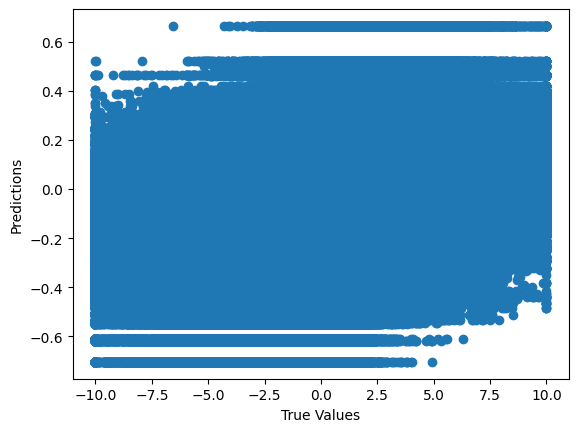

In [11]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

In [ ]:
# Load and Predict 

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('my_model.h5')

In [ ]:
# Create a way to generate entrance
df2 = pd.read_csv("X-Cell_line_OneHotEncoder.csv")
df2 = df2.drop(df2.columns[0], axis=1)

In [ ]:
# Lineas celulares para la simulación de prueba
# ['A375', 'A549', 'A673', 'AGS', 'ASC', 'BT20', 'CD34', 'CL34', 'CORL23', 'COV644', 'DV90', 'EFO27', 'FIBRNPC', 'H1299', 'HA1E', 'HCC15', 'HCC515',
#  'HCT116', 'HEC108', 'HEK293T', 'HEPG2', 'HL60', 'HS27A', 'HS578T', 'HT115', 'HT29', 'HUH7', 'JHUEM2', 'JURKAT', 'LOVO', 'MCF10A', 'MCF7', 'MDAMB231',
#  'MDST8', 'NCIH1694', 'NCIH1836', 'NCIH2073', 'NCIH508', 'NCIH596', 'NEU', 'NKDBA', 'NOMO1', 'NPC', 'OV7', 'PC3', 'PHH', 'PL21', 'RKO', 'RMGI', 'RMUGS',
#  'SKB', 'SKBR3', 'SKLU1', 'SKM1', 'SKMEL1', 'SKMEL28', 'SNGM', 'SNU1040', 'SNUC4', 'SNUC5', 'SW480', 'SW620', 'SW948', 'T3M10', 'THP1', 'TYKNU', 'U266',
#  'U937', 'VCAP', 'WSUDLCL2'],

In [8]:
# Molécula en formato smiles
smiles = 'CCN1CCCC[C@@H]1C(=O)N1C[C@H]2CCC[C@@H]2C1'

# Concentración en uM
uM_Concentration = 10

# Tiempo en horas
Hours = 24

# Cell Line
Cell_Line = str("WSUDLCL2")

In [9]:
# Generación de entry
selected_row = df2[df2['category'] == Cell_Line]
values = selected_row.iloc[:, 1:72].values
entry = pd.DataFrame(values, columns=selected_row.columns[1:72])

entry['uM'] = uM_Concentration
entry['Hr'] = Hours

# convert smiles to RDKit molecule and create MF
mol = Chem.MolFromSmiles(smiles)
fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=881)

# convert fingerprint to array
fp_array = np.zeros((1,))
AllChem.DataStructs.ConvertToNumpyArray(fp, fp_array)

# create DataFrame with 1 row and 880 columns
fp_df = pd.DataFrame(fp_array.reshape(1, -1))
entry = pd.concat([entry, fp_df], axis=1)

In [40]:
# predict on test data
y_pred = model.predict(entry)
y_pred_1 = pd.DataFrame(y_pred.reshape(1, -1))
y_pred_2 = y_pred_1.iloc[:, :784]
y_pred_3 = y_pred_2[:784].values

1/1 [==============================] - 0s 48ms/step


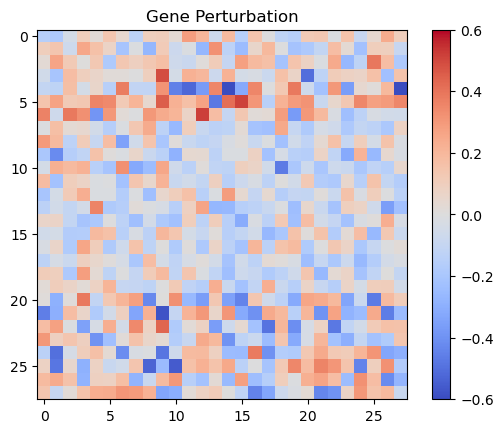

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have an array called 'data' of shape (978, 1)
# Reshape it to a 31x32 matrix
data_matrix = np.reshape(y_pred_3, (28, 28))

# Create a heatmap of the data matrix
plt.imshow(data_matrix, cmap='coolwarm', vmin=-0.6, vmax=0.6, interpolation='nearest')
plt.colorbar()
plt.title("Gene Perturbation")
plt.show()